# **Cluster Analysis Notebook**

### Objectives
* Fit and evaluate a cluster model to group similar data
* Understand the profile for each cluster

### Inputs
* General Dataset: outputs/datasets/collection/BreakfastSurvey.csv
* Instructions on which variables to use for data cleaning and feature engineering. They are found in their respective notebooks.

### Outputs
* Cluster Pipeline
* Train Set
* Most important features to define a cluster plot
* Cluster Profile Description
* Cluster Silhoulette

---

## Change working directory
We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspaces/Guest-Survey-Analysis-to-Improve-Hotel-Breakfast/jupyter_notebooks'

We want to make the parent of the current directory the new current directory.
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspaces/Guest-Survey-Analysis-to-Improve-Hotel-Breakfast'

---

## Load Data

In [4]:
import pandas as pd
df = (pd.read_csv("outputs/datasets/collection/BreakfastSurvey.csv")
    .drop("breakfast", axis=1)
)
df.head(3)

,appearance,service,staff,variety,price,taste,hotel
0,1,7,3,1,2,1,3
1,1,5,3,1,2,1,2
2,7,7,4,5,8,7,7


## Cluster Pipeline with data

### ML Cluster Pipeline

In [5]:
from sklearn.pipeline import Pipeline
from feature_engine.selection import SmartCorrelatedSelection

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from feature_engine import transformation as vt

def PipelineCluster():
    pipeline_base = Pipeline([
        ("BoxCox", vt.BoxCoxTransformer(['appearance', 'staff'])),

        ("yeo_johnson", vt.YeoJohnsonTransformer(['price', 'taste', "hotel"])),

        ("SmartCorrelatedSelection", SmartCorrelatedSelection(variables=None,
            method="spearman", threshold=0.8, selection_method="variance",    
        )),

        ("scaler", StandardScaler()),

        ("PCA", PCA(n_components=50, random_state=0)),

        ("model", KMeans(n_clusters=50, random_state=0)),

    ])
    return pipeline_base

### Principal Component Analysis (PCA)

In [6]:
pipeline_cluster = PipelineCluster()
pipeline_pca = Pipeline(pipeline_cluster.steps[:-2])
df_pca = pipeline_pca.fit_transform(df)

print(df_pca.shape,'\n', type(df_pca))

(27332, 5) 
 <class 'numpy.ndarray'>


Apply PCA separately to the scaled data

* The 5 components explain 100.0% of the data 



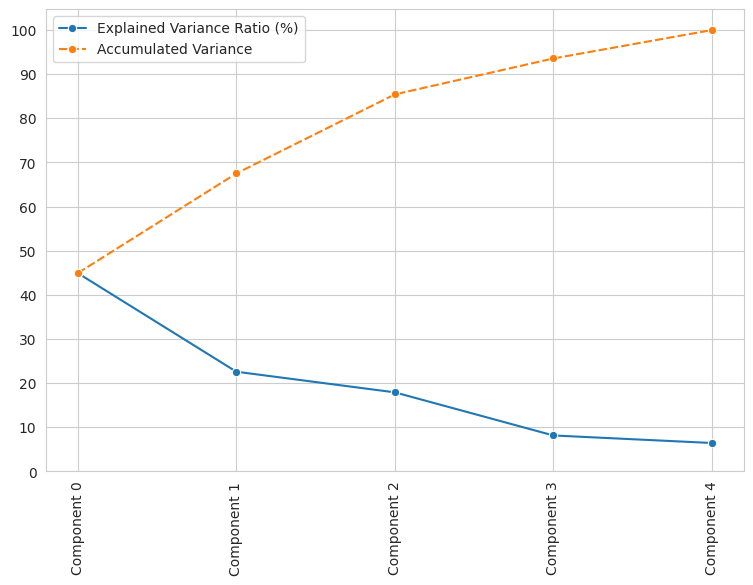

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

n_components = 5

def pca_components_analysis(df_pca, n_components):
    pca = PCA(n_components=n_components).fit(df_pca)
    x_PCA = pca.transform(df_pca)

    ComponentsList = ["Component " + str(number)
                      for number in range(n_components)]
    dfExplVarRatio = pd.DataFrame(
        data=np.round(100 * pca.explained_variance_ratio_, 3),
        index=ComponentsList,
        columns=['Explained Variance Ratio (%)'])

    dfExplVarRatio['Accumulated Variance'] = dfExplVarRatio['Explained Variance Ratio (%)'].cumsum(
    )

    PercentageOfDataExplained = dfExplVarRatio['Explained Variance Ratio (%)'].sum(
    )

    print(
        f"* The {n_components} components explain {round(PercentageOfDataExplained,2)}% of the data \n")
    plt.figure(figsize=(9, 6))
    sns.lineplot(data=dfExplVarRatio,  marker="o")
    plt.xticks(rotation=90)
    plt.yticks(np.arange(0, 110, 10))
    plt.show()


pca_components_analysis(df_pca=df_pca, n_components=n_components)

* The 3 components explain 85.42% of the data 



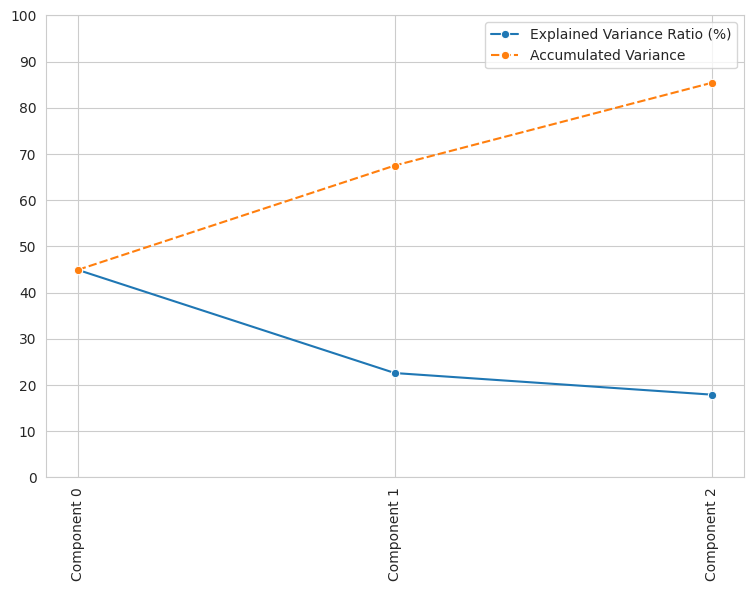

In [8]:
pca_components_analysis(df_pca=df_pca,n_components=3)

In [9]:
def PipelineCluster():
    pipeline_base = Pipeline([
        ("BoxCox", vt.BoxCoxTransformer(['appearance', 'staff'])),

        ("yeo_johnson", vt.YeoJohnsonTransformer(['price', 'taste', "hotel"])),

        ("SmartCorrelatedSelection", SmartCorrelatedSelection(variables=None,
            method="spearman", threshold=0.8, selection_method="variance",    
        )),

        ("scaler", StandardScaler()),

        ("PCA", PCA(n_components=3, random_state=0)),

        ("model", KMeans(n_clusters=6, random_state=0)),

    ])
    return pipeline_base

PipelineCluster()

Pipeline(steps=[('BoxCox',
                 BoxCoxTransformer(variables=['appearance', 'staff'])),
                ('yeo_johnson',
                 YeoJohnsonTransformer(variables=['price', 'taste', 'hotel'])),
                ('SmartCorrelatedSelection',
                 SmartCorrelatedSelection(method='spearman',
                                          selection_method='variance')),
                ('scaler', StandardScaler()),
                ('PCA', PCA(n_components=3, random_state=0)),
                ('model', KMeans(n_clusters=6, random_state=0))])

### Elbow Method and Silhouette Score

In [10]:
pipeline_cluster = PipelineCluster()
pipeline_analysis = Pipeline(pipeline_cluster.steps[:-1])
df_analysis = pipeline_analysis.fit_transform(df)

print(df_analysis.shape,'\n', type(df_analysis))

(27332, 3) 
 <class 'numpy.ndarray'>


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

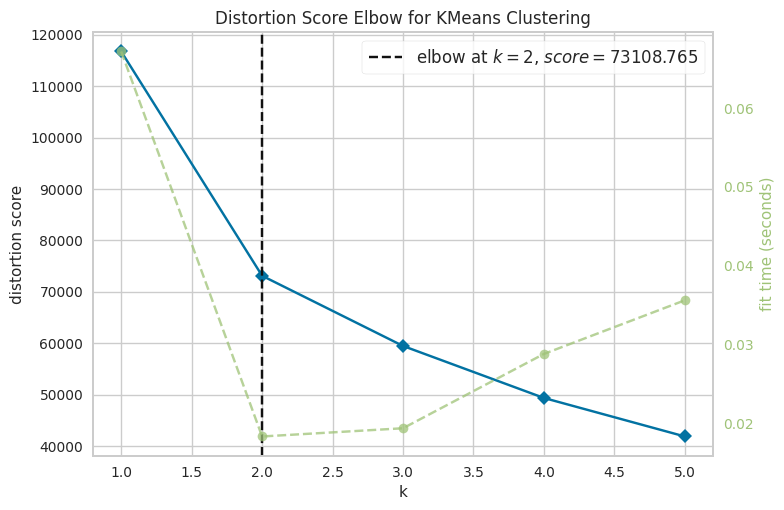

In [11]:
from yellowbrick.cluster import KElbowVisualizer

visualizer = KElbowVisualizer(KMeans(random_state=0), k=(1,6))
visualizer.fit(df_analysis) 
plt.rcParams["font.family"] = "DejaVu Sans" 
visualizer.show()
plt.show()

=== Average Silhouette Score for different number of clusters ===


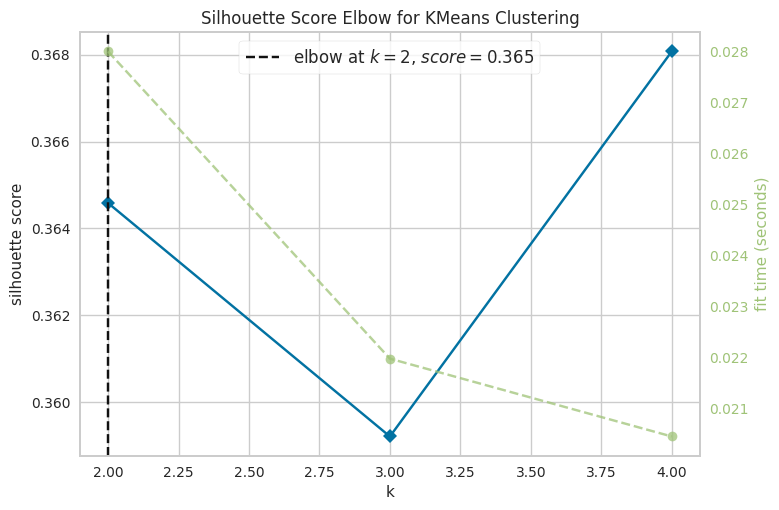



=== Silhouette plot for 2 Clusters ===


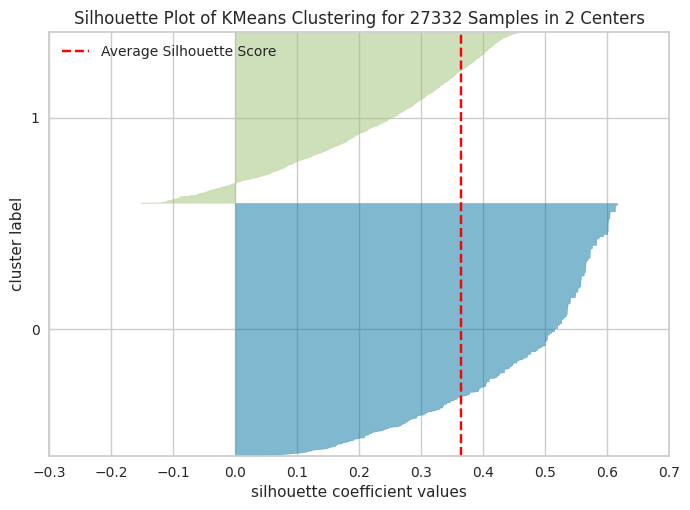



=== Silhouette plot for 3 Clusters ===


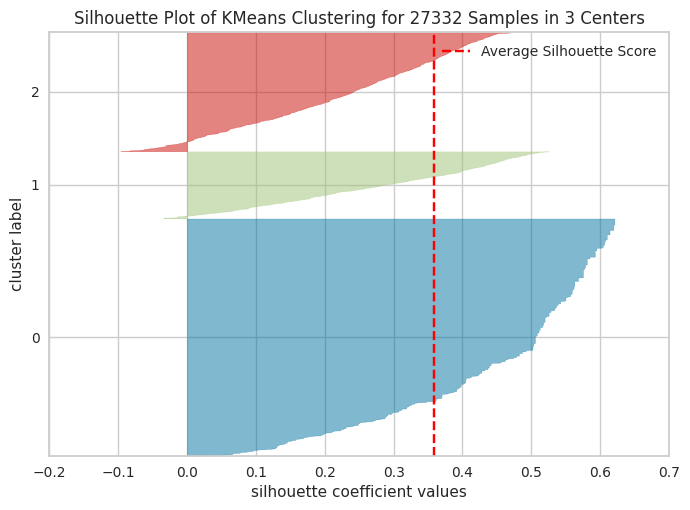



=== Silhouette plot for 4 Clusters ===


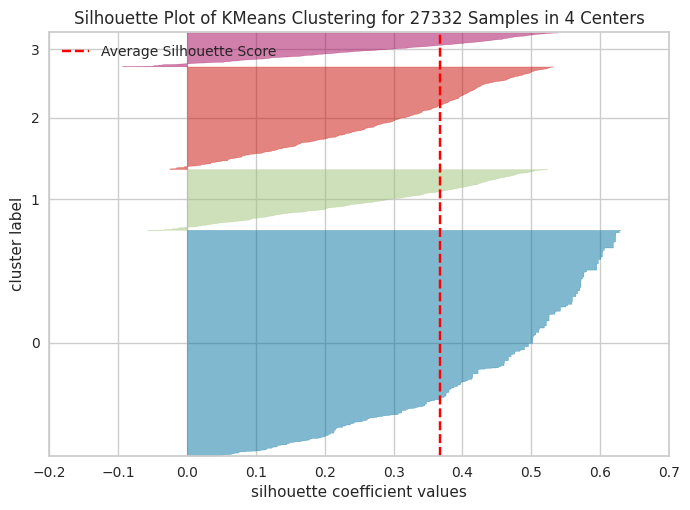

In [12]:
from yellowbrick.cluster import SilhouetteVisualizer

n_cluster_start, n_cluster_stop = 2, 5

print("=== Average Silhouette Score for different number of clusters ===")
visualizer = KElbowVisualizer(KMeans(random_state=0), k=(
    n_cluster_start, n_cluster_stop), metric='silhouette')
visualizer.fit(df_analysis)
visualizer.show()
plt.show()
print("\n")


for n_clusters in np.arange(start=n_cluster_start, stop=n_cluster_stop):

    print(f"=== Silhouette plot for {n_clusters} Clusters ===")
    visualizer = SilhouetteVisualizer(estimator=KMeans(n_clusters=n_clusters, random_state=0),
                                      colors='yellowbrick')
    visualizer.fit(df_analysis)
    visualizer.show()
    plt.rcParams["font.family"] = "DejaVu Sans" 
    plt.show()
    print("\n")

In [13]:


def PipelineCluster():
    pipeline_base = Pipeline([

        ("SmartCorrelatedSelection", SmartCorrelatedSelection(variables=None, method="spearman",
                                                              threshold=0.8, selection_method="variance")),

        ("scaler", StandardScaler()),

        ("PCA", PCA(n_components=3, random_state=0)),

        ("model", KMeans(n_clusters=2, random_state=0)),

    ])
    return pipeline_base

PipelineCluster()



Pipeline(steps=[('SmartCorrelatedSelection',
                 SmartCorrelatedSelection(method='spearman',
                                          selection_method='variance')),
                ('scaler', StandardScaler()),
                ('PCA', PCA(n_components=3, random_state=0)),
                ('model', KMeans(n_clusters=2, random_state=0))])

### Fit Cluster Pipeline

Quick recap of our data for training cluster pipeline

In [14]:
X = df.copy()
print(X.shape)
X.head(3)

(27332, 7)


,appearance,service,staff,variety,price,taste,hotel
0,1,7,3,1,2,1,3
1,1,5,3,1,2,1,2
2,7,7,4,5,8,7,7


Fit Cluster pipeline

In [15]:
pipeline_cluster = PipelineCluster()
pipeline_cluster.fit(X)

Pipeline(steps=[('SmartCorrelatedSelection',
                 SmartCorrelatedSelection(method='spearman',
                                          selection_method='variance')),
                ('scaler', StandardScaler()),
                ('PCA', PCA(n_components=3, random_state=0)),
                ('model', KMeans(n_clusters=2, random_state=0))])

## Add cluster predictions to dataset

We add a column `"Clusters"` (with the cluster pipeline predictions) to the dataset

In [16]:
X['Clusters'] = pipeline_cluster['model'].labels_
print(X.shape)
X.head(3)

(27332, 8)


,appearance,service,staff,variety,price,taste,hotel,Clusters
0,1,7,3,1,2,1,3,0
1,1,5,3,1,2,1,2,0
2,7,7,4,5,8,7,7,1


* Clusters frequencies 
          proportion
Clusters            
0               0.61
1               0.39 




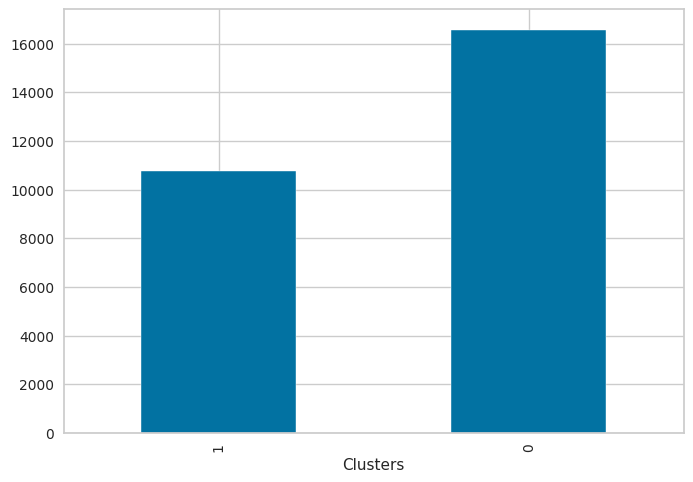

In [17]:
print(f"* Clusters frequencies \n{ X['Clusters'].value_counts(normalize=True).to_frame().round(2)} \n\n")
X['Clusters'].value_counts().sort_values().plot(kind='bar')
plt.rcParams["font.family"] = "DejaVu Sans" 
plt.show()

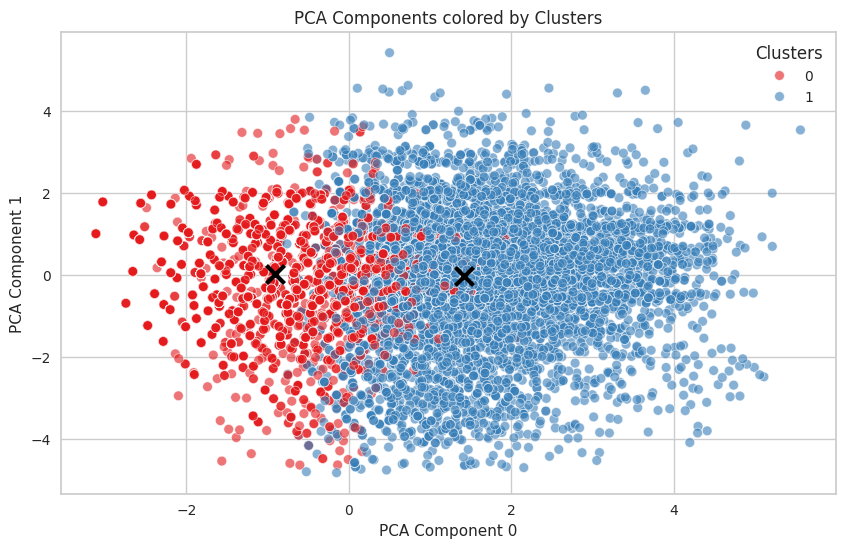

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_analysis[:, 0], y=df_analysis[:, 1],
                hue=X['Clusters'], palette='Set1', alpha=0.6)
plt.scatter(x=pipeline_cluster['model'].cluster_centers_[:, 0], y=pipeline_cluster['model'].cluster_centers_[:, 1],
            marker="x", s=169, linewidths=3, color="black")
plt.xlabel("PCA Component 0")
plt.ylabel("PCA Component 1")
plt.title("PCA Components colored by Clusters")
plt.show()

We save the cluster predictions from this pipeline to use in the future. We will get back to that in a later stage.

In [19]:
cluster_predictions_with_all_variables = X['Clusters']
cluster_predictions_with_all_variables

0        0
1        0
2        1
3        0
4        1
        ..
27327    0
27328    0
27329    0
27330    0
27331    0
Name: Clusters, Length: 27332, dtype: int32

### Fit a classifier, where the target is cluster predictions and features remaining variables

We copy X to a DataFrame df_clf

In [20]:
df_clf = X.copy()
print(df_clf.shape)
df_clf.head(3)

(27332, 8)


,appearance,service,staff,variety,price,taste,hotel,Clusters
0,1,7,3,1,2,1,3,0
1,1,5,3,1,2,1,2,0
2,7,7,4,5,8,7,7,1


Split Train and Test sets

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df_clf.drop(['Clusters'], axis=1),
    df_clf['Clusters'],
    test_size=0.2,
    random_state=0
)

print(X_train.shape, X_test.shape)

(21865, 7) (5467, 7)


In [22]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

Create classifier pipeline steps

In [23]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import GradientBoostingClassifier

def PipelineClf2ExplainClusters():
    pipeline_base = Pipeline([
        ("BoxCox", vt.BoxCoxTransformer(['appearance', 'staff'])),

        ("yeo_johnson", vt.YeoJohnsonTransformer(['price', 'taste', "hotel"])),

        ("SmartCorrelatedSelection", SmartCorrelatedSelection(variables=None,
            method="spearman", threshold=0.8, selection_method="variance",    
        )),
        
        ("scaler", StandardScaler()),

        ("feat_selection", SelectFromModel(
            GradientBoostingClassifier(random_state=0))),

        ("model", GradientBoostingClassifier(random_state=0)),

    ])
    return pipeline_base


PipelineClf2ExplainClusters()

Pipeline(steps=[('BoxCox',
                 BoxCoxTransformer(variables=['appearance', 'staff'])),
                ('yeo_johnson',
                 YeoJohnsonTransformer(variables=['price', 'taste', 'hotel'])),
                ('SmartCorrelatedSelection',
                 SmartCorrelatedSelection(method='spearman',
                                          selection_method='variance')),
                ('scaler', StandardScaler()),
                ('feat_selection',
                 SelectFromModel(estimator=GradientBoostingClassifier(random_state=0))),
                ('model', GradientBoostingClassifier(random_state=0))])

Fit the classifier to the training data

In [24]:
pipeline_clf_cluster = PipelineClf2ExplainClusters()
pipeline_clf_cluster.fit(X_train, y_train)

Pipeline(steps=[('BoxCox',
                 BoxCoxTransformer(variables=['appearance', 'staff'])),
                ('yeo_johnson',
                 YeoJohnsonTransformer(variables=['price', 'taste', 'hotel'])),
                ('SmartCorrelatedSelection',
                 SmartCorrelatedSelection(method='spearman',
                                          selection_method='variance')),
                ('scaler', StandardScaler()),
                ('feat_selection',
                 SelectFromModel(estimator=GradientBoostingClassifier(random_state=0))),
                ('model', GradientBoostingClassifier(random_state=0))])

## Evaluate classifier performance on Train and Test Sets

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_train, pipeline_clf_cluster.predict(X_train)))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     13235
           1       0.94      0.88      0.91      8630

    accuracy                           0.93     21865
   macro avg       0.93      0.92      0.93     21865
weighted avg       0.93      0.93      0.93     21865



In [26]:
print(classification_report(y_test, pipeline_clf_cluster.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      3344
           1       0.94      0.88      0.91      2123

    accuracy                           0.93      5467
   macro avg       0.94      0.92      0.93      5467
weighted avg       0.93      0.93      0.93      5467



## Assess the most important Features that define a cluster

* These are the 2 most important features in descending order. The model was trained on them: 
['hotel', 'variety'] 



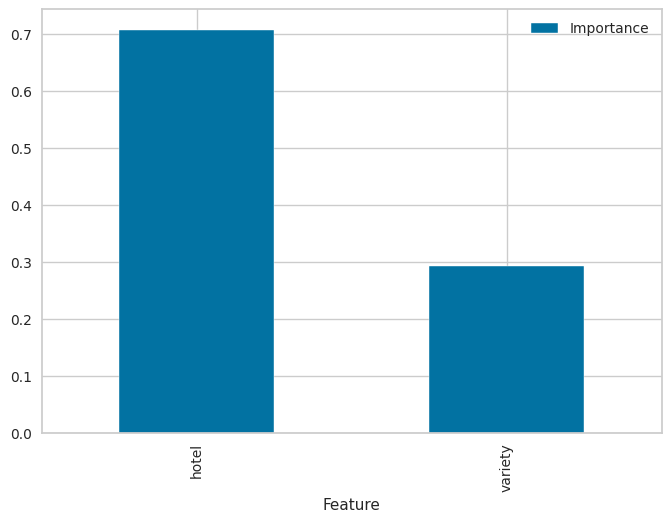

In [27]:
data_cleaning_feat_eng_steps = 3
columns_after_data_cleaning_feat_eng = (Pipeline(pipeline_clf_cluster.steps[:data_cleaning_feat_eng_steps])
                                        .transform(X_train)
                                        .columns)

best_features = columns_after_data_cleaning_feat_eng[pipeline_clf_cluster['feat_selection'].get_support(
)].to_list()


df_feature_importance = (pd.DataFrame(data={
    'Feature': columns_after_data_cleaning_feat_eng[pipeline_clf_cluster['feat_selection'].get_support()],
    'Importance': pipeline_clf_cluster['model'].feature_importances_})
    .sort_values(by='Importance', ascending=False)
)


best_features = df_feature_importance['Feature'].to_list()

print(f"* These are the {len(best_features)} most important features in descending order. "
      f"The model was trained on them: \n{best_features} \n")
df_feature_importance.plot(kind='bar', x='Feature', y='Importance')
plt.show()

Store the best_features to use at a later stage.

In [28]:
best_features_pipeline_all_variables = best_features
best_features_pipeline_all_variables

['hotel', 'variety']

## Cluster Analysis

Load function that plots a table with description for all Clusters

In [29]:
def DescriptionAllClusters(df, decimal_points=3):

    DescriptionAllClusters = pd.DataFrame(
        columns=df.drop(['Clusters'], axis=1).columns)
   
    for cluster in df.sort_values(by='Clusters')['Clusters'].unique():

        EDA_ClusterSubset = df.query(
            f"Clusters == {cluster}").drop(['Clusters'], axis=1)
        ClusterDescription = Clusters_IndividualDescription(
            EDA_ClusterSubset, cluster, decimal_points)
        DescriptionAllClusters = pd.concat(
            [ClusterDescription, DescriptionAllClusters])

    DescriptionAllClusters.set_index(['Cluster'], inplace=True)
    return DescriptionAllClusters


def Clusters_IndividualDescription(EDA_Cluster, cluster, decimal_points):

    ClustersDescription = pd.DataFrame(columns=EDA_Cluster.columns)

    for col in EDA_Cluster.columns:

        try:  

            if EDA_Cluster[col].dtypes == 'object':

                top_frequencies = EDA_Cluster.dropna(
                    subset=[col])[[col]].value_counts(normalize=True).nlargest(n=3)
                Description = ''

                for x in range(len(top_frequencies)):
                    freq = top_frequencies.iloc[x]
                    category = top_frequencies.index[x][0]
                    CategoryPercentage = int(round(freq*100, 0))
                    statement = f"'{category}': {CategoryPercentage}% , "
                    Description = Description + statement

                ClustersDescription.at[0, col] = Description[:-2]

            elif EDA_Cluster[col].dtypes in ['float', 'int']:
                DescStats = EDA_Cluster.dropna(subset=[col])[[col]].describe()
                Q1 = round(DescStats.iloc[4, 0], decimal_points)
                Q3 = round(DescStats.iloc[6, 0], decimal_points)
                Description = f"{Q1} -- {Q3}"
                ClustersDescription.at[0, col] = Description

        except Exception as e:
            ClustersDescription.at[0, col] = 'Not available'
            print(
                f"** Error Exception: {e} - cluster {cluster}, variable {col}")

    ClustersDescription['Cluster'] = str(cluster)

    return ClustersDescription

Load a custom function to plot cluster distribution per Variable (absolute and relative levels)

In [30]:
import plotly.express as px


def cluster_distribution_per_variable(df, target):
    df_bar_plot = df.groupby(['Clusters', target]).size().reset_index(name='Count')
    df_bar_plot.columns = ['Clusters', target, 'Count']
    df_bar_plot[target] = df_bar_plot[target].astype('object')

    print(f"Clusters distribution across {target} levels")
    fig = px.bar(df_bar_plot, x='Clusters', y='Count',
                 color=target, width=800, height=500)
    fig.update_layout(xaxis=dict(tickmode='array',
                      tickvals=df['Clusters'].unique()))
    fig.show(renderer='jupyterlab')

    df_relative = (df
                   .groupby(["Clusters", target])
                   .size()
                   .unstack(fill_value=0)
                   .apply(lambda x: 100 * x / x.sum(), axis=1)
                   .stack()
                   .reset_index(name='Relative Percentage (%)')
                   .sort_values(by=['Clusters', target])
                   )

    print(f"Relative Percentage (%) of {target} in each cluster")
    fig = px.line(df_relative, x='Clusters', y='Relative Percentage (%)',
                  color=target, width=800, height=500)
    fig.update_layout(xaxis=dict(tickmode='array',
                      tickvals=df['Clusters'].unique()))
    fig.update_traces(mode='markers+lines')
    fig.show(renderer='jupyterlab')

Create a DataFrame that contains best features and Clusters Predictions since we want to analyse the patterns for each cluster.

In [31]:
df_cluster_profile = df_clf.copy()
df_cluster_profile = df_cluster_profile.filter(items=best_features + ['Clusters'], axis=1)

df_cluster_profile["Clusters"] =  df_cluster_profile["Clusters"]

print(df_cluster_profile.shape)
df_cluster_profile.head(3)

(27332, 3)


,hotel,variety,Clusters
0,3,1,0
1,2,1,0
2,7,5,1


In [32]:
df_survey = pd.read_csv("outputs/datasets/collection/BreakfastSurvey.csv").filter(['breakfast'])
df_survey.head(3)

,breakfast
0,"Yes, next time not"
1,No
2,"Yes, next time not"


Check breakfast leveles in the clusters

In [33]:
pd.set_option('display.max_colwidth', None)
clusters_profile = DescriptionAllClusters(df=pd.concat([df_cluster_profile,df_survey], axis=1), decimal_points=0)

clusters_profile

,hotel,variety,breakfast
Cluster,,,
1,3.0 -- 5.0,2.0 -- 5.0,"'No': 57% , 'Yes, next time not': 32% , 'Yes, again': 12%"
0,1.0 -- 3.0,1.0 -- 1.0,"'No': 91% , 'Yes, next time not': 8% , 'Yes, again': 0%"


In [34]:
df_cluster_vs_breakfast =  df_survey.copy()
df_cluster_vs_breakfast['Clusters'] = X['Clusters']
cluster_distribution_per_variable(df=df_cluster_vs_breakfast, target="breakfast")

Clusters distribution across breakfast levels


/home/cistudent/.local/lib/python3.12/site-packages/plotly/express/_core.py:2065: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


Relative Percentage (%) of breakfast in each cluster


/home/cistudent/.local/lib/python3.12/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



## Fit New Cluster Pipeline with most important features

In [35]:
best_features_pipeline_all_variables

['hotel', 'variety']

### Subset data with the most relevant variables

In [36]:
df_reduced = df.filter(best_features_pipeline_all_variables)
df_reduced.head(3)

,hotel,variety
0,3,1
1,2,1
2,7,5


### Rewrite Cluster Pipeline

In [37]:


def PipelineCluster():
    pipeline_base = Pipeline([
        ("yeo_johnson", vt.YeoJohnsonTransformer(["hotel"])),
        
        ("scaler", StandardScaler()),

        ("model", KMeans(n_clusters=2, random_state=0)),

    ])
    return pipeline_base


PipelineCluster()


Pipeline(steps=[('yeo_johnson', YeoJohnsonTransformer(variables=['hotel'])),
                ('scaler', StandardScaler()),
                ('model', KMeans(n_clusters=2, random_state=0))])

### Apply Elbow Method and Silhouette analysis

In [38]:
pipeline_cluster = PipelineCluster()
pipeline_analysis = Pipeline(pipeline_cluster.steps[:-1])
df_analysis = pipeline_analysis.fit_transform(df_reduced)

print(df_analysis.shape,'\n', type(df_analysis))

(27332, 2) 
 <class 'numpy.ndarray'>


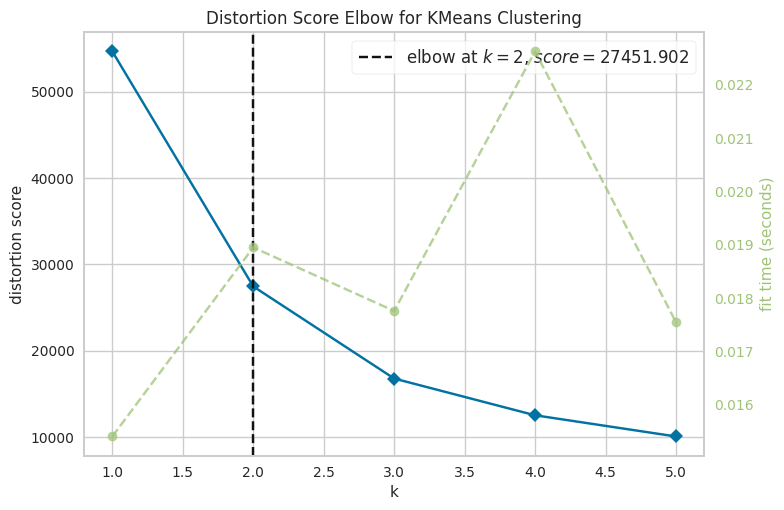

In [39]:
from yellowbrick.cluster import KElbowVisualizer
visualizer = KElbowVisualizer(KMeans(random_state=0), k=(1,6))
visualizer.fit(df_analysis) 
visualizer.show() 
plt.show()

=== Average Silhouette Score for different number of clusters ===


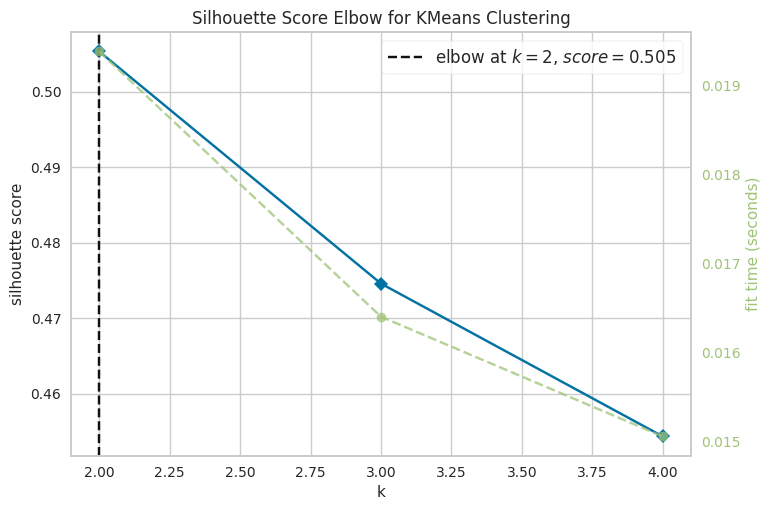



=== Silhouette plot for 2 Clusters ===


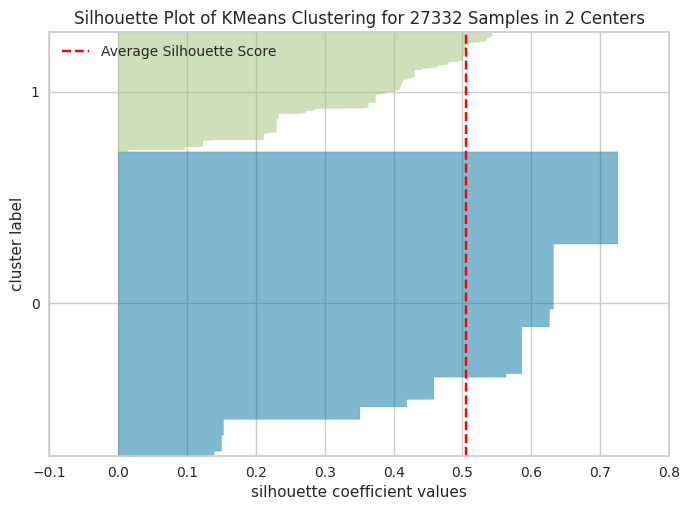



=== Silhouette plot for 3 Clusters ===


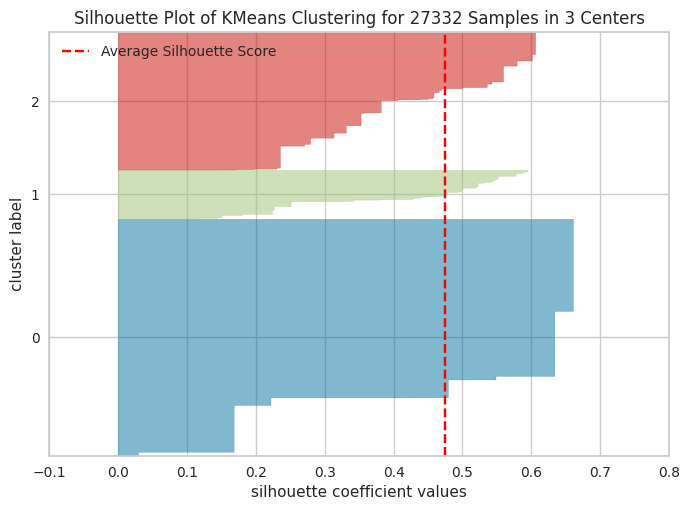



=== Silhouette plot for 4 Clusters ===


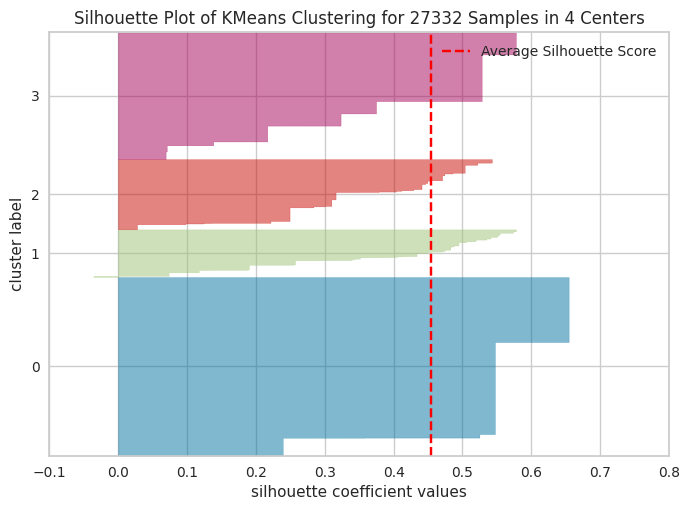

In [40]:
from yellowbrick.cluster import SilhouetteVisualizer

n_cluster_start, n_cluster_stop = 2, 5

print("=== Average Silhouette Score for different number of clusters ===")
visualizer = KElbowVisualizer(KMeans(random_state=0), k=(
    n_cluster_start, n_cluster_stop), metric='silhouette')
visualizer.fit(df_analysis)
visualizer.show()
plt.show()
print("\n")


for n_clusters in np.arange(start=n_cluster_start, stop=n_cluster_stop):

    print(f"=== Silhouette plot for {n_clusters} Clusters ===")
    visualizer = SilhouetteVisualizer(estimator=KMeans(n_clusters=n_clusters, random_state=0),
                                      colors='yellowbrick')
    visualizer.fit(df_analysis)
    visualizer.show()
    plt.show()
    print("\n")

### Fit New Cluster Pipeline

In [41]:
X = df_reduced.copy()
print(X.shape)
X.head(3)

(27332, 2)


,hotel,variety
0,3,1
1,2,1
2,7,5


In [42]:
pipeline_cluster = PipelineCluster()
pipeline_cluster.fit(X)

Pipeline(steps=[('yeo_johnson', YeoJohnsonTransformer(variables=['hotel'])),
                ('scaler', StandardScaler()),
                ('model', KMeans(n_clusters=2, random_state=0))])

### Add cluster predictions to dataset

In [43]:
X['Clusters'] = pipeline_cluster['model'].labels_
print(X.shape)
X.head(3)

(27332, 3)


,hotel,variety,Clusters
0,3,1,0
1,2,1,0
2,7,5,1


* Clusters frequencies 
          proportion
Clusters            
0               0.72
1               0.28 




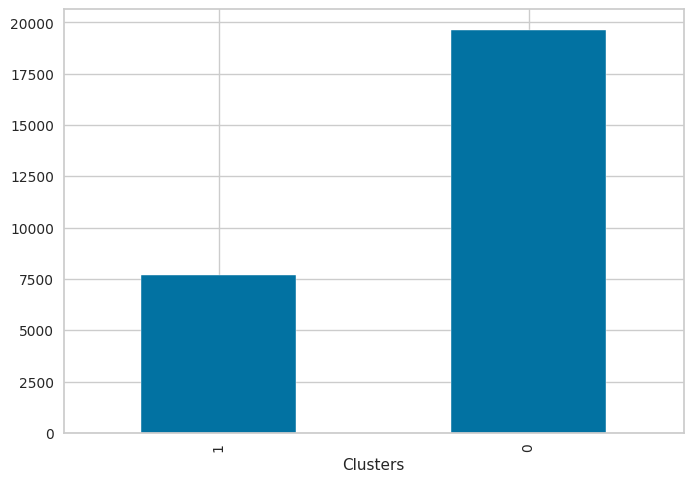

In [44]:
print(f"* Clusters frequencies \n{ X['Clusters'].value_counts(normalize=True).to_frame().round(2)} \n\n")
X['Clusters'].value_counts().sort_values().plot(kind='bar')
plt.show()

### Compare current cluster predictions to previous cluster predictions

In [45]:
cluster_predictions_with_all_variables

0        0
1        0
2        1
3        0
4        1
        ..
27327    0
27328    0
27329    0
27330    0
27331    0
Name: Clusters, Length: 27332, dtype: int32

In [46]:
cluster_predictions_with_best_features = X['Clusters'] 
cluster_predictions_with_best_features

0        0
1        0
2        1
3        0
4        0
        ..
27327    0
27328    0
27329    0
27330    0
27331    0
Name: Clusters, Length: 27332, dtype: int32

In [47]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(cluster_predictions_with_all_variables, cluster_predictions_with_best_features))


[[16399   180]
 [ 3253  7500]]


### Fit a classifier, where the target is cluster predictions and features remaining variables

In [48]:
df_clf = X.copy()
print(df_clf.shape)
df_clf.head(3)

(27332, 3)


,hotel,variety,Clusters
0,3,1,0
1,2,1,0
2,7,5,1


In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_clf.drop(['Clusters'], axis=1),
    df_clf['Clusters'],
    test_size=0.2,
    random_state=0
)

print(X_train.shape, X_test.shape)

(21865, 2) (5467, 2)


In [50]:


def PipelineClf2ExplainClusters():
    pipeline_base = Pipeline([
        ("yeo_johnson", vt.YeoJohnsonTransformer(["hotel"])),

        ("scaler", StandardScaler()),

        ("model", GradientBoostingClassifier(random_state=0)),

    ])
    return pipeline_base


PipelineClf2ExplainClusters()

Pipeline(steps=[('yeo_johnson', YeoJohnsonTransformer(variables=['hotel'])),
                ('scaler', StandardScaler()),
                ('model', GradientBoostingClassifier(random_state=0))])

### Fit a classifier, where the target is cluster labels and features remaining variables

In [51]:
pipeline_clf_cluster = PipelineClf2ExplainClusters()
pipeline_clf_cluster.fit(X_train,y_train)

Pipeline(steps=[('yeo_johnson', YeoJohnsonTransformer(variables=['hotel'])),
                ('scaler', StandardScaler()),
                ('model', GradientBoostingClassifier(random_state=0))])

### Evaluate classifier performance on Train and Test Sets

In [52]:
print(classification_report(y_train, pipeline_clf_cluster.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15715
           1       1.00      1.00      1.00      6150

    accuracy                           1.00     21865
   macro avg       1.00      1.00      1.00     21865
weighted avg       1.00      1.00      1.00     21865



In [53]:
print(classification_report(y_test, pipeline_clf_cluster.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3937
           1       1.00      1.00      1.00      1530

    accuracy                           1.00      5467
   macro avg       1.00      1.00      1.00      5467
weighted avg       1.00      1.00      1.00      5467



### Assess Most Important Features

* These are the 2 most important features in descending order. The model was trained on them: 
['variety', 'hotel']


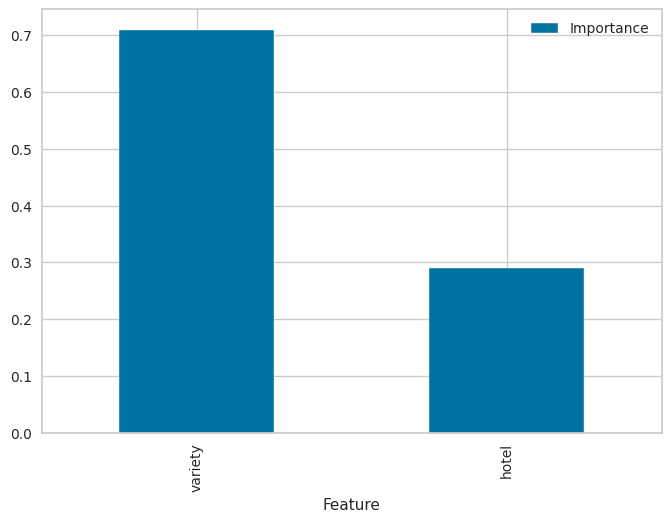

In [54]:
best_features = X_train.columns.to_list()

df_feature_importance = (pd.DataFrame(data={
    'Feature': best_features,
    'Importance': pipeline_clf_cluster['model'].feature_importances_})
    .sort_values(by='Importance', ascending=False)
)

best_features = df_feature_importance['Feature'].to_list()

print(f"* These are the {len(best_features)} most important features in descending order. "
      f"The model was trained on them: \n{df_feature_importance['Feature'].to_list()}")

df_feature_importance.plot(kind='bar', x='Feature', y='Importance')
plt.show()

### Cluster Analysis

In [55]:
df_cluster_profile = df_clf.copy()
df_cluster_profile = df_cluster_profile.filter(items=best_features + ['Clusters'], axis=1)
df_cluster_profile.head(3)

,variety,hotel,Clusters
0,1,3,0
1,1,2,0
2,5,7,1


In [56]:
df_breakfast = pd.read_csv("outputs/datasets/collection/BreakfastSurvey.csv").filter(['breakfast'])
df_breakfast['breakfast'] = df_breakfast['breakfast'].astype('object')
df_breakfast.head(3)

,breakfast
0,"Yes, next time not"
1,No
2,"Yes, next time not"


### Cluster profile on most important features

In [58]:
pd.set_option('display.max_colwidth', None)
clusters_profile = DescriptionAllClusters(df= pd.concat([df_cluster_profile,df_breakfast], axis=1), decimal_points=0)
clusters_profile

,variety,hotel,breakfast
Cluster,,,
1,3.0 -- 6.0,4.0 -- 6.0,"'No': 58% , 'Yes, next time not': 29% , 'Yes, again': 13%"
0,1.0 -- 2.0,2.0 -- 3.0,"'No': 86% , 'Yes, next time not': 13% , 'Yes, again': 1%"


In [59]:
df_cluster_vs_breakfast=  df_breakfast.copy()
df_cluster_vs_breakfast['Clusters'] = X["Clusters"]
cluster_distribution_per_variable(df=df_cluster_vs_breakfast, target='breakfast')

Clusters distribution across breakfast levels


/home/cistudent/.local/lib/python3.12/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



Relative Percentage (%) of breakfast in each cluster


/home/cistudent/.local/lib/python3.12/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



## Conclusion

 - Cluster analysis with all variabels is predict better `breakfast`
 - Cluster analysis with most important variables use only 2 variable to predict
 - Cluster accuracy 100% by both

We chose the clusters with most important features

## Push files to Repo

In [60]:
import joblib
import os

version = 'v1'
file_path = f'outputs/ml_pipeline/cluster_analysis/{version}'

try:
    os.makedirs(name=file_path)
except Exception as e:
    print(e)

[Errno 17] File exists: 'outputs/ml_pipeline/cluster_analysis/v1'


### Cluster pipeline

In [61]:
pipeline_cluster

Pipeline(steps=[('yeo_johnson', YeoJohnsonTransformer(variables=['hotel'])),
                ('scaler', StandardScaler()),
                ('model', KMeans(n_clusters=2, random_state=0))])

In [62]:
joblib.dump(value=pipeline_cluster, filename=f"{file_path}/cluster_pipeline.pkl")

['outputs/ml_pipeline/cluster_analysis/v1/cluster_pipeline.pkl']

### Train Set

In [63]:
print(df_reduced.shape)
df_reduced.head(3)

(27332, 2)


,hotel,variety
0,3,1
1,2,1
2,7,5


In [64]:
df_reduced.to_csv(f"{file_path}/TrainSet.csv", index=False)

### Most important features plot

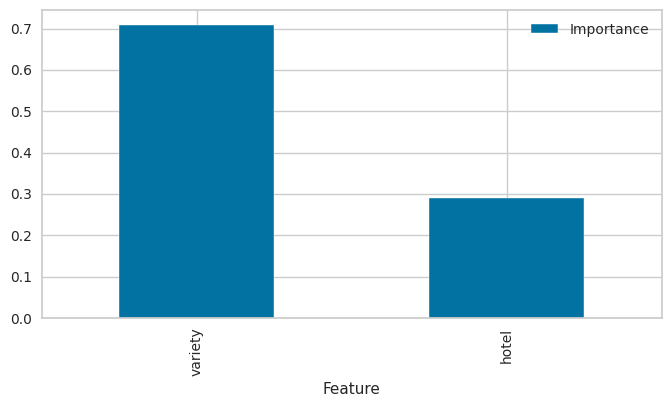

In [65]:
df_feature_importance.plot(kind='bar',x='Feature',y='Importance', figsize=(8,4))
plt.show()

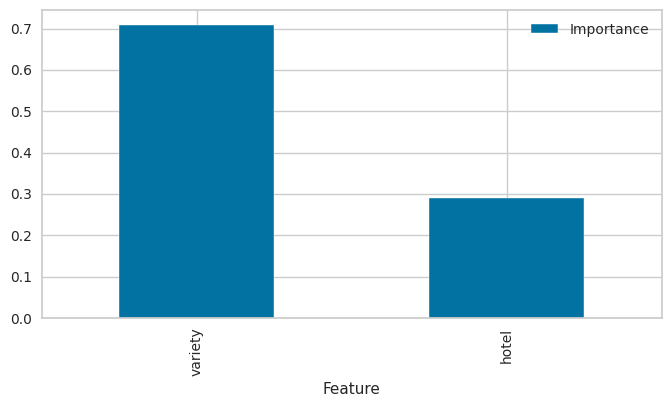

In [66]:
df_feature_importance.plot(kind='bar',x='Feature',y='Importance', figsize=(8,4))
plt.savefig(f"{file_path}/features_define_cluster.png", bbox_inches='tight', dpi=150)

### Cluster Profile

In [67]:
clusters_profile

,variety,hotel,breakfast
Cluster,,,
1,3.0 -- 6.0,4.0 -- 6.0,"'No': 58% , 'Yes, next time not': 29% , 'Yes, again': 13%"
0,1.0 -- 2.0,2.0 -- 3.0,"'No': 86% , 'Yes, next time not': 13% , 'Yes, again': 1%"


In [68]:
clusters_profile.to_csv(f"{file_path}/clusters_profile.csv")

### Cluster silhouette plot

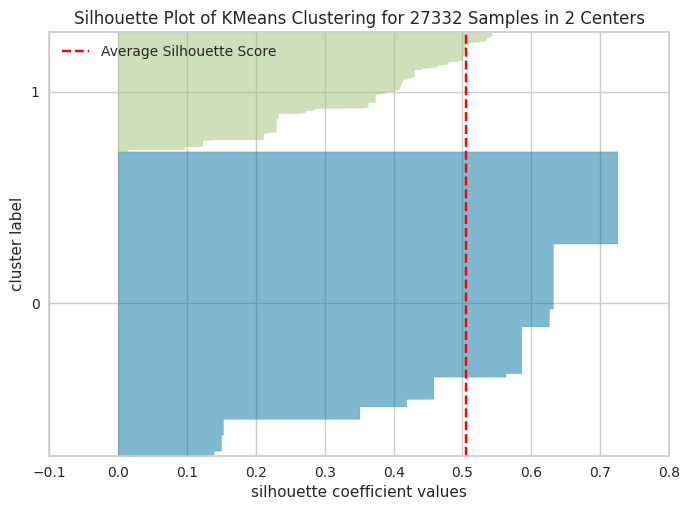

In [69]:
visualizer = SilhouetteVisualizer(Pipeline(pipeline_cluster.steps[-1:])[0] , colors='yellowbrick')
visualizer.fit(df_analysis)
visualizer.show()
plt.show()

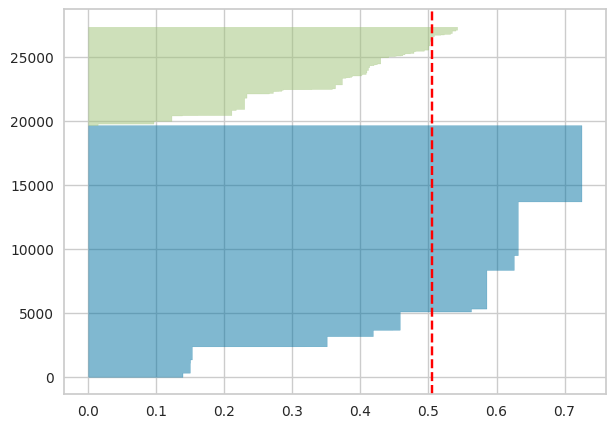

In [70]:
fig, axes = plt.subplots(figsize=(7,5))
fig = SilhouetteVisualizer(Pipeline(pipeline_cluster.steps[-1:])[0] , colors='yellowbrick', ax=axes)
fig.fit(df_analysis)

plt.savefig(f"{file_path}/clusters_silhouette.png", bbox_inches='tight',dpi=150)